# Linnaeus University
## Introduction to Machine learning, 25VT-2DV516
## Assignment 1

**Name:** ## Your name here ## 

**Email:** ## Your email here ##

## Introduction

In this assignment you will handle four exercises related to the k-Nearest Neighbors algorithm.
The main purpose is to get you up and running using Python, NumPy and Matplotlib. 
The library Scipy will be used specifically in Exercise 3, part 2.

## Submission Instructions

All exercises are individual. We expect you to submit a zip file with this notebook with your solutions and the MachineLearning.py with the models implemented. 
You must normalize your data before doing anything with your data.
When grading your assignments we will in addition to functionality also take into account code quality. 
We expect well structured and efficient solutions. 
Finally, keep all your files in a single folder named as username_A1 and submit a zipped version of this folder.

### Exercise 1: Models implementation and testing (All Mandatory)

1. Implement all the methods in the abstract classes **KNNRegressionModel** and **KNNClassificationModel** in the MachineLearningModel.py file. 
As the names suggest, you must implement the Regression (slide 30) and Classification (slide 24) versions of the KNN algorithm and you must follow the algorithms stated in the slides. 
* Both models must use the Euclidean distance as the distance function (*Tip: Code smart by implementing an auxiliary method _euclidian_distance() in the MachineLearningModel.py file*).
* The evaluate() function for the **KNNRegressionModel** must implement the Mean Squared Error (MSE)
* The evaluate() function for the **KNNClassificationModel** must count the number of correct predictions.

2. Use the *Polynomial200.csv* dataset to show that all your methods for the **KNNRegressionModel** is working as expected. You must produce a similar figure to the one in slide 31. Instructions to produce the figure are present in the slide. You must show the effects of using k = 3, 5, 7 and 9 and discuss your findings on the figure produced.

**Discuss your findings for this question below**

**Answer**

As k grows from 3 to 9, the fit steadily smooths out—small k (3) overfits the noise with jagged peaks, while large k (9) oversmooths and misses real features—yet all curves converge at the extremes where data are sparse. The held-out MSE is lowest at k = 5, showing it best balances variance and bias by capturing the underlying wiggles without chasing random fluctuations.




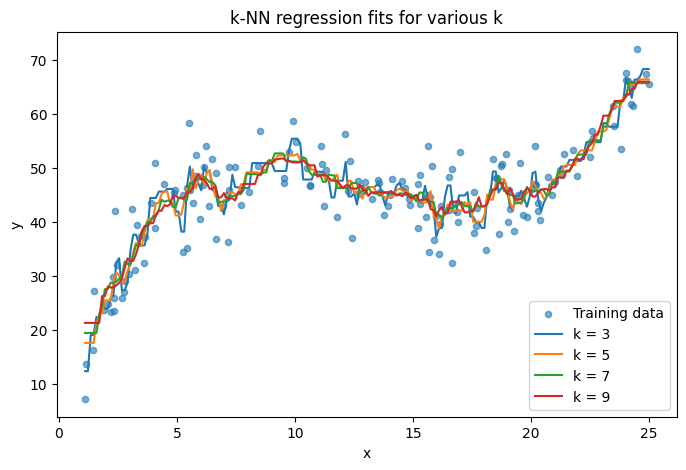

In [1]:
### Your code here ###
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import KNNRegressionModel

#load Polynomial200.csv (assumes header row, two columns: x,y)
data = np.loadtxt('Polynomial200.csv', delimiter=',', skiprows=1)
X = data[:, 0].reshape(-1, 1)   # shape (200,1)
y = data[:, 1]                  # shape (200,)

# Shuffle + split 80/20
rng = np.random.default_rng(42)
idx = rng.permutation(len(X))
split = int(0.8 * len(X))
train_idx, test_idx = idx[:split], idx[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

#normalise features
# Compute mean & std on training set
mu    = X_train.mean(axis=0)     # shape (1,)
sigma = X_train.std(axis=0)      # shape (1,)

# Apply to both train and test
X_train_n = (X_train - mu) / sigma
X_test_n  = (X_test  - mu) / sigma


#  Fit k-NN for k=3,5,7,9

# Prepare a fine grid over the original x-range
x_grid    = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
x_grid_n  = (x_grid - mu) / sigma

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, s=20, alpha=0.6, label='Training data')

for k in [3, 5, 7, 9]:
    model = KNNRegressionModel(k=k)
    model.fit(X_train_n, y_train)
    
    # Predict on grid to get smooth curve
    y_grid_pred = model.predict(x_grid_n)
    
    plt.plot(x_grid, y_grid_pred, label=f'k = {k}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('k-NN regression fits for various k')
plt.show()




3. Use the *IrisDataset.csv* dataset to show that all your methods for the **KNNClassificationModel** is working as expected. You must produce a similar figure to the one in slide 28. Instructions on how to produce the figure are given in the slide. You must choose 2 input variables only to produce the figure (they do not need to match the figure in the slide). You must show the effects of using k = 3, 5, 7, and 9 and discuss the figure produced.

**Tips**

* Check the function *np.meshgrid* from numpy to create the samples.
* Check the function *plt.contourf* for generating the countours. 
* There are many tutorials online to produce this figure. Find one that most suits you.

**Discuss your findings for this question below**

----- Your answer here -----

In [3]:
### Your code here ###
import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import KNNClassificationModel


raw = np.genfromtxt('IrisDataset.csv', delimiter=',', dtype=None, encoding=None, skip_header=1)
# columns: sepal_len, sepal_wid, petal_len, petal_wid, species
X = np.array([row[2:4] for row in raw], float)    # shape (150,2)
species = [row[4] for row in raw]
_, y = np.unique(species, return_inverse=True)

#Train/test split
rng = np.random.default_rng(0)
idx = rng.permutation(len(X))
split = int(0.7 * len(X))
train_idx, test_idx = idx[:split], idx[split:]
X_train, y_train = X[train_idx], y[train_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

#normalize only on the two features
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train_n = (X_train - mu) / sigma
X_test_n  = (X_test  - mu) / sigma

# build a meshgrid over the feature‐space
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_n = (grid - mu) / sigma

#Plot decision boundaries for different k values
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for ax, k in zip(axes.ravel(), [3,5,7,9]):
    model = KNNClassificationModel(k=k)
    model.fit(X_train_n, y_train)
    
    Z = model.predict(grid_n)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='k', s=40)
    ax.set_title(f'k = {k}')
    ax.set_xlabel('petal length')
    ax.set_ylabel('petal width')

plt.suptitle('Iris decision regions (train data)')    
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

### Exercise 2: KNN Regression (Mandatory)

1. (Mandatory) Create a procedure to repeat 10 times the following strategy.
* Use the values for k = 3, 5, 7, 9, 11, 13 and 15.
* Split your dataset randomly into 80% for training, and 20% testing. Use 10 different seeds for splitting the data.
* Evaluate (MSE implemented in your class) your **KNNRegressionModel** for each k in the **test set** and store the result. 
* Plot a barchart with these results.

Which k gives the best regression? Motivate your answer!

**Discuss your findings for this question below**

----- Your answer here -----

In [ ]:
### Your code here ###

### Exercise 3: KNN Classification (1 Mandatory , 1 Non-Mandatory)

1. **(Mandatory)** Using the **IrisDataset.csv**, find the best combination of two features that produces the best model using **KNNClassificationModel**.
* You must try all combinations of two features, and for k = 3, 5, 7, and 9.
* You must use plots to support your answer.

**Discuss your findings for this question below**

----- Your answer here -----


In [ ]:
### Your code here ###

2. **(Non-mandatory)** Implement a new Class called **FastKNNClassificationModel**. This method should be faster than your regular implementation. This can be done by using a faster data structure to look for the closest neighbors faster. In this assignment, you must build the KDTree with the the training data and then search for the neighbors using it.

* You must use this implementation of KDTree from Scipy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html
* The methods needed for your implementation are only the *constructor* (to build the KDTree) and the method *query* to find the k-neighbors.
* You must design an experiment using the **IrisDataset.csv** with **all features** to show that your new implementation is faster than your implementation of **KNNClassificationModel**.
* For example, you can measure the time using of each prediction, for each classifier, and plot the average time to give a decision for entries. Also, measure how this would increase/decrease with the increment of the input parameter *k*. 
* Use a plot(s) from matplotlib to support your answer.

**Discuss your findings for this question below**

----- Your answer here -----

In [ ]:
### Your code here ###

## Exercise 4: MNIST k-NN classification (Non-mandatory)

In this final exercise, we will use k-NN for classifying handwritten digits using the very famous MNIST dataset. Input to the algorithm is an image (28x28 pixel) with a handwritten digit (0-9) and the output should be a classification 0-9. The dataset and a description of it is available at http://yann.lecun.com/exdb/mnist/. Google MNIST Python to learn how to access it. The objective is to use your k-NN classifier to perform as good as possible on recognizing handwritten images. Describe your effort and what you found out to be the best k to lower the test error. The complete dataset has 60,000 digits for training and 10,000 digits for testing. Hence the computations might be heavy, so start of by a smaller subset rather than using the entire dataset. The final testing should (if possible) be done for the full test set but we will accept solutions that use "only" 10,000 digits for training and 1,000 digits for testing.
The description of this exercise is deliberately vague as you are supposed to, on your own, find a suitable way to solve this problem in detail. This is why it is important that you document your effort and progress in your report. **You must use your implementations of KNN for classification. If you successfully finished Exercise 3, part 2, it is advisable to use your FastKNNClassificationModel**

In [ ]:
### Your code here ###